# Bank Data

The bank data set contain more than 1 million rows (or observations) and 24 original columns (or variables). Three target variables are provided, but the primary focus is on the binary target (accounts that contracted at least one product in the previous campaign season).

The bank data set consists of observations taken on a large financial services firm's accounts. Accounts in the data represent consumers of home equity lines of credit, automobile loans, and other types of short- to medium-term credit instruments.

https://github.com/sassoftware/sas-viya-machine-learning/tree/master/data/bank

# Importa Bibliotecas

#### Swat: 
- https://sassoftware.github.io/python-swat/index.html
- https://github.com/sassoftware/python-swat

#### Pipefitter: 
- https://sassoftware.github.io/python-pipefitter/index.html
- https://github.com/sassoftware/python-pipefitter

#### Exemplos:
- https://github.com/sassoftware/sas-viya-programming

In [1]:
from swat import *
from pipefitter.pipeline import Pipeline
from pipefitter.transformer import Imputer
from pipefitter.estimator import DecisionTree, DecisionForest, GBTree
from pipefitter.model_selection import HyperParameterTuning
from getpass import getpass
import matplotlib.pyplot as plt
%matplotlib inline

# Conecta ao SAS Viya

In [2]:
sas = CAS('localhost', 5570, 'sasdemo', getpass('Please enter your passwod:'))

Please enter your passwod:········


# Lista Fontes de Dados

In [3]:
sas.caslibinfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(sasdemo),PATH,Personal File System Caslib,/home/sasdemo/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0
1,Examples,PATH,,/sasdata/LG/,,0.0,0.0,0.0,0.0,0.0,0.0
2,Formats,PATH,Stores user defined formats.,/opt/sas/viya/config/data/cas/default/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
3,Invoices,PATH,,/sasdata/invoices/,,0.0,0.0,0.0,0.0,0.0,0.0
4,ModelPerformanceData,PATH,Library for Model Management performance objects.,/opt/sas/viya/config/data/cas/default/modelMon...,,0.0,0.0,0.0,0.0,0.0,0.0
5,Models,PATH,Stores models created by Visual Analytics for ...,/opt/sas/viya/config/data/cas/default/models/,,0.0,0.0,0.0,0.0,0.0,0.0
6,PGDATA,postgres,,,uid = 'sas',0.0,0.0,0.0,0.0,0.0,0.0
7,Public,PATH,"Shared and writeable caslib, accessible to all...",/opt/sas/viya/config/data/cas/default/public/,,0.0,0.0,0.0,0.0,0.0,0.0
8,QASMartStore,PATH,Stores quality analytic suite mart tables.,/opt/sas/viya/config/data/cas/default/qasMartS...,,0.0,0.0,0.0,0.0,0.0,0.0
9,Samples,PATH,"Stores sample data, supplied by SAS.",/opt/sas/viya/config/data/cas/default/samples/,,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
sas.addcaslib(name='BANKS',
              path='/sasdata/banks',
              datasource='path',
              session=False)

NOTE: 'BANKS' is now the active caslib.
NOTE: Cloud Analytic Services added the caslib 'BANKS'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,BANKS,PATH,,/sasdata/banks/,,0.0,0.0,1.0,0.0,0.0,0.0


# Lista Tabelas

In [7]:
sas.tableinfo(caslib='BANKS')

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,BANK,1060038,25,0,utf-8,2019-07-24T14:57:49-04:00,2019-07-24T14:57:49-04:00,2019-07-24T14:57:49-04:00,UTF8,1.879614e+09,...,1,0,0,banks.sashdat,BANKS,0,sasdemo,,2019-07-23T18:45:36-04:00,1.879541e+09


# Carrega os Dados

In [6]:
bank = sas.table.loadtable(caslib='BANKS', path='banks.sashdat',
                           casout={'caslib':'BANKS', 'name':'BANK'},
                           promote=True)['casTable']

NOTE: Cloud Analytic Services made the file banks.sashdat available as table BANK in caslib BANKS.


In [8]:
bank.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,cat_input1,Account Activity Level,1,char,5,5,,0,0
1,cat_input2,Customer Value Level,2,char,1,1,,0,0
2,cnt_tgt,Count Number New Products,3,double,8,12,,0,0
3,demog_age,Customer Age,4,double,8,12,,0,0
4,demog_ho,Homeowner Binary,5,double,8,12,,0,0
5,demog_pr,Percentage Retired,6,double,8,12,,0,0
6,int_tgt,Interval New Sales,7,double,8,10,DOLLAR,10,2
7,demog_homeval,Replaced Home Value,8,double,8,12,,0,0
8,demog_inc,Replaced Income,9,double,8,12,,0,0
9,rfm1,Average Sales Past 3 Years,10,double,8,9,DOLLAR,9,2


In [9]:
bank.head()

,cat_input1,cat_input2,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,...,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm,account,target
0,Z,C,0.0,NaN,0.0,26.0,NaN,87299.0,NaN,23.0,...,2.0,2.0,22.0,12.0,5.0,22.0,1.0,0.0,100732434,0.0
1,Z,C,0.0,50.0,1.0,32.0,NaN,88768.0,60808.0,15.0,...,2.0,2.0,21.0,9.0,4.0,21.0,0.0,1.0,100732435,0.0
2,Z,C,0.0,55.0,1.0,21.0,NaN,88384.0,60000.0,12.5,...,2.0,2.0,17.0,12.0,6.0,21.0,1.0,0.0,100732436,0.0
3,Z,B,0.0,40.0,0.0,31.0,NaN,105266.0,55329.0,40.0,...,2.0,2.0,18.0,12.0,6.0,18.0,1.0,0.0,100732437,0.0
4,Z,C,0.0,57.0,1.0,31.0,NaN,141292.0,106651.0,12.5,...,3.0,3.0,19.0,13.0,7.0,24.0,1.0,0.0,100732438,0.0


# Análise Descritiva

In [10]:
bank.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,cnt_tgt,0.00,6.00,1060037.0,1.0,0.311756,3.304730e+05,0.699682,0.000680,4.895551e-01,6.219730e+05,5.189460e+05,224.432543,458.748527,0.0,2.399664,5.563220
1,demog_age,-1.00,89.00,793177.0,266861.0,58.716371,4.657248e+07,16.850767,0.018921,2.839484e+02,2.959788e+09,2.252210e+08,28.698585,3103.305833,0.0,-0.359941,-0.501027
2,demog_ho,0.00,1.00,1060038.0,0.0,0.550260,5.832970e+05,0.497468,0.000483,2.474741e-01,5.832970e+05,2.623317e+05,90.405861,1138.843722,0.0,-0.202066,-1.959173
3,demog_pr,0.00,101.00,1060038.0,0.0,30.569372,3.240470e+07,11.526008,0.011195,1.328489e+02,1.131416e+09,1.408247e+08,37.704432,2730.664289,0.0,-0.153946,1.334697
4,int_tgt,0.00,500000.00,211509.0,848529.0,11235.867221,2.376487e+09,8491.803349,18.464413,7.211072e+07,4.195389e+13,1.525200e+13,75.577641,608.514731,0.0,13.297027,620.778778
5,demog_homeval,7436.00,600067.00,1047905.0,12133.0,107332.048794,1.124738e+11,93123.181215,90.969718,8.671927e+09,2.115939e+16,9.087347e+15,86.761766,1179.865690,0.0,2.477066,7.218258
6,demog_inc,2493.00,200007.00,806785.0,253253.0,53040.586201,4.279235e+10,18976.611646,21.127094,3.601118e+08,2.560264e+15,2.905324e+14,35.777530,2510.548137,0.0,1.703280,5.421430
7,rfm1,-1.00,3713.31,1060038.0,0.0,16.092977,1.705917e+07,19.302513,0.018748,3.725870e+02,6.694888e+08,3.949560e+08,119.943703,858.387259,0.0,103.311691,17308.171876
8,rfm2,1.58,650.00,1060038.0,0.0,13.351539,1.415314e+07,9.470888,0.009199,8.969772e+01,2.840491e+08,9.508290e+07,70.934806,1451.447491,0.0,11.122100,386.037431
9,rfm3,0.00,3713.31,834252.0,225786.0,15.309885,1.277230e+07,18.966735,0.020766,3.597370e+02,4.956534e+08,3.001110e+08,123.885548,737.272411,0.0,114.916624,20666.889103


In [11]:
bank.describe()

,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,rfm2,rfm3,...,rfm6,rfm7,rfm8,rfm9,rfm10,rfm11,rfm12,demog_genf,demog_genm,target
count,1.060037e+06,793177.000000,1.060038e+06,1.060038e+06,211509.000000,1.047905e+06,806785.000000,1.060038e+06,1.060038e+06,834252.000000,...,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06,1.060038e+06
mean,3.117561e-01,58.716371,5.502605e-01,3.056937e+01,11235.867221,1.073320e+05,53040.586201,1.609298e+01,1.335154e+01,15.309885,...,9.539004e+00,1.666682e+00,5.025925e+00,1.835155e+01,1.288971e+01,5.358573e+00,6.813478e+01,5.620082e-01,4.379918e-01,1.995296e-01
std,6.996821e-01,16.850767,4.974677e-01,1.152601e+01,8491.803349,9.312318e+04,18976.611646,1.930251e+01,9.470888e+00,18.966735,...,8.472128e+00,1.525684e+00,4.510099e+00,4.021609e+00,4.607368e+00,1.360372e+00,3.734930e+01,4.961403e-01,4.961403e-01,3.996470e-01
min,0.000000e+00,-1.000000,0.000000e+00,0.000000e+00,0.000000,7.436000e+03,2493.000000,-1.000000e+00,1.580000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,46.000000,0.000000e+00,2.500000e+01,6000.000000,5.200400e+04,40297.000000,1.000000e+01,8.400000e+00,10.000000,...,3.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01,1.100000e+01,5.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,60.000000,1.000000e+00,3.100000e+01,10000.000000,7.447300e+04,48779.000000,1.500000e+01,1.167000e+01,14.000000,...,7.000000e+00,1.000000e+00,4.000000e+00,1.800000e+01,1.200000e+01,6.000000e+00,6.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,73.000000,1.000000e+00,3.700000e+01,16000.000000,1.233050e+05,61525.000000,2.000000e+01,1.550000e+01,20.000000,...,1.300000e+01,2.000000e+00,7.000000e+00,2.000000e+01,1.300000e+01,6.000000e+00,1.030000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,6.000000e+00,89.000000,1.000000e+00,1.010000e+02,500000.000000,6.000670e+05,200007.000000,3.713310e+03,6.500000e+02,3713.310000,...,1.270000e+02,1.100000e+01,4.600000e+01,2.900000e+01,7.700000e+01,2.200000e+01,5.710000e+02,1.000000e+00,1.000000e+00,1.000000e+00


/opt/anaconda3/lib/python3.7/site-packages/swat/cas/table.py:6562: RuntimeWarning: Data downloads are limited to 10000 rows.  To change this limit, set swat.options.cas.dataset.max_rows_fetched to the desired limit.
  % max_rows_fetched, RuntimeWarning)


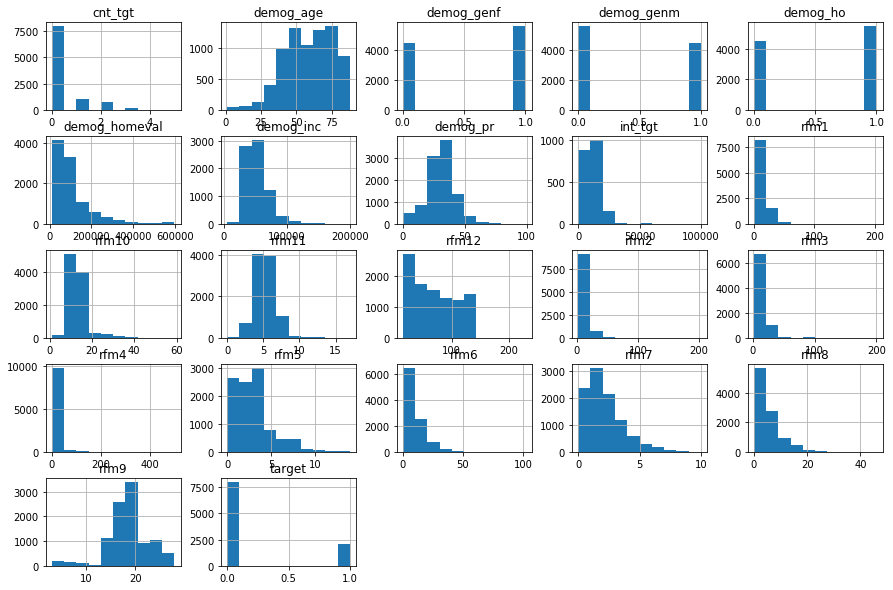

In [12]:
bank.hist(figsize = (15, 10));

# Correlação entre Variáveis

In [13]:
bank.correlation()['Correlation']

,Variable,cnt_tgt,demog_age,demog_ho,demog_pr,int_tgt,demog_homeval,demog_inc,rfm1,rfm2,...,Nobs13,Nobs14,Nobs15,Nobs16,Nobs17,Nobs18,Nobs19,Nobs20,Nobs21,Nobs22
0,cnt_tgt,1.000000,0.051292,-0.010121,0.000795,-0.103455,0.130231,0.068149,-0.132165,-0.218569,...,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0,1060037.0
1,demog_age,0.051292,1.000000,-0.029747,0.094259,-0.019889,-0.010475,-0.065517,-0.029967,-0.069982,...,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0,793177.0
2,demog_ho,-0.010121,-0.029747,1.000000,0.075389,0.007759,0.043352,0.100970,-0.000986,0.002180,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
3,demog_pr,0.000795,0.094259,0.075389,1.000000,-0.010615,-0.056288,-0.038618,-0.011524,-0.033689,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
4,int_tgt,-0.103455,-0.019889,0.007759,-0.010615,1.000000,0.017058,0.025766,0.396097,0.318374,...,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0,211509.0
5,demog_homeval,0.130231,-0.010475,0.043352,-0.056288,0.017058,1.000000,0.620252,0.057236,0.117262,...,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0,1047905.0
6,demog_inc,0.068149,-0.065517,0.100970,-0.038618,0.025766,0.620252,1.000000,0.063584,0.096123,...,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0,806785.0
7,rfm1,-0.132165,-0.029967,-0.000986,-0.011524,0.396097,0.057236,0.063584,1.000000,0.635554,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
8,rfm2,-0.218569,-0.069982,0.002180,-0.033689,0.318374,0.117262,0.096123,0.635554,1.000000,...,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0,1060038.0
9,rfm3,-0.138973,-0.043354,0.001554,-0.015338,0.281172,0.062367,0.091528,0.881384,0.634108,...,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0,834252.0


# Correlação com a Target

In [14]:
bank.correlation()['Correlation'][['Variable','target']]

,Variable,target
0,cnt_tgt,0.892451
1,demog_age,0.055459
2,demog_ho,-0.002842
3,demog_pr,0.000716
4,int_tgt,NaN
5,demog_homeval,0.194501
6,demog_inc,0.109916
7,rfm1,-0.121623
8,rfm2,-0.206869
9,rfm3,-0.129962


# Particionamento Estratificado dos Dados

In [15]:
bank.groupby('target') \
    .stratified(output={'casOut':{'name':'BANK_PART', 'caslib':'BANKS', 'replace':True}, 'copyVars':'ALL'},
                samppct=70,
                partind=True)

NOTE: Using SEED=426023408 for sampling.


[outputSize]

 {'outputNObs': 1060038.0, 'outputNVars': 26}

[STRAFreq]

 Frequencies
 
    ByGrpID        target    NObs   NSamp
 0        0             0  848529  593970
 1        1             1  211509  148056

[OutputCasTables]

   casLib       Name Label     Rows  Columns  \
 0  BANKS  BANK_PART        1060038       26   
 
                                 casTable  
 0  CASTable('BANK_PART', caslib='BANKS')  

+ Elapsed: 0.322s, user: 1.92s, sys: 0.242s, mem: 52.5mb

In [16]:
part = sas.CASTable(caslib='BANKS', name='BANK_PART')

# Separação das Variáveis

In [17]:
columns_info = part.columninfo()['ColumnInfo']

In [18]:
vars_cat = columns_info['Column'][columns_info['Type']=='char'].tolist()
vars_cat.remove('account')
print(vars_cat)

['cat_input1', 'cat_input2']


In [19]:
vars_num = columns_info['Column'][columns_info['Type']=='double'].tolist()
vars_num.remove("_PartInd_")
vars_num.remove("int_tgt")
vars_num.remove("cnt_tgt")
vars_num.remove("target")
print(vars_num)

['demog_age', 'demog_ho', 'demog_pr', 'demog_homeval', 'demog_inc', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_genf', 'demog_genm']


In [20]:
target = "target"

# Imputação

In [21]:
part.info()

CASTable('BANK_PART', caslib='BANKS')
Data columns (total 26 columns):
                     N   Miss    Type
cat_input1     1060038  False    char
cat_input2     1060038  False    char
cnt_tgt        1060037   True  double
demog_age       793177   True  double
demog_ho       1060038  False  double
demog_pr       1060038  False  double
int_tgt         211509   True  double
demog_homeval  1047905   True  double
demog_inc       806785   True  double
rfm1           1060038  False  double
rfm2           1060038  False  double
rfm3            834252   True  double
rfm4           1060038  False  double
rfm5           1060038  False  double
rfm6           1060038  False  double
rfm7           1060038  False  double
rfm8           1060038  False  double
rfm9           1060038  False  double
rfm10          1060038  False  double
rfm11          1060038  False  double
rfm12          1060038  False  double
demog_genf     1060038  False  double
demog_genm     1060038  False  double
account        10

In [22]:
mode_imputer = Imputer(value=Imputer.MODE)

In [23]:
abt = mode_imputer.transform(part)
abt.info()

CASTable('IMPUTE_D3CC0D4E_CAF9_4473_A4DE_FE3A0640EC5F', caslib='BANKS')
Data columns (total 26 columns):
                     N   Miss    Type
cat_input1     1060038  False    char
cat_input2     1060038  False    char
cnt_tgt        1060038  False  double
demog_age      1060038  False  double
demog_ho       1060038  False  double
demog_pr       1060038  False  double
int_tgt        1060038  False  double
demog_homeval  1060038  False  double
demog_inc      1060038  False  double
rfm1           1060038  False  double
rfm2           1060038  False  double
rfm3           1060038  False  double
rfm4           1060038  False  double
rfm5           1060038  False  double
rfm6           1060038  False  double
rfm7           1060038  False  double
rfm8           1060038  False  double
rfm9           1060038  False  double
rfm10          1060038  False  double
rfm11          1060038  False  double
rfm12          1060038  False  double
demog_genf     1060038  False  double
demog_genm     106003

# Árvore de Decisão

In [26]:
params = dict(max_depth=6,
              target=target,
              nominals=vars_cat+[target],
              inputs=vars_cat+vars_num)

tree = DecisionTree(**params)

In [29]:
model = tree.fit(abt[abt['_PartInd_']==0])

In [30]:
model.score(abt[abt['_PartInd_']==1])

Target                         target
Level                           CLASS
Var                            _DT_P_
NBins                             100
NObsUsed                       742026
TargetCount                    742026
TargetMiss                          0
PredCount                      742026
PredMiss                            0
Event                               0
EventCount                     593970
NonEventCount                  148056
EventMiss                           0
AreaUnderROCCurve            0.725116
KS                           0.443334
KSCutOff                         0.67
MisClassificationRate           19.46
CRCut                            0.32
ClassificationCutOff              0.5
dtype: object

# Definindo um Pipeline

## Imputadores

In [31]:
mode_imputer = Imputer(value=Imputer.MODE)
mean_imputer = Imputer(value=Imputer.MEAN)

## Estimadores

In [32]:
params = dict(max_depth=6,
              target=target,
              nominals=vars_cat+[target],
              inputs=vars_cat+vars_num)

tree = DecisionTree(**params)
tree2 = DecisionTree(**params)
rf = DecisionForest(**params)

## Pipeline

In [33]:
pipeline = Pipeline([mode_imputer, tree, mean_imputer, tree2, rf])

## Treino

In [34]:
model = pipeline.fit(part[part['_PartInd_']==0])

## Avaliação

In [35]:
model.score(part[part['_PartInd_']==1])

,Target,Level,Var,NBins,NObsUsed,TargetCount,TargetMiss,PredCount,PredMiss,Event,EventCount,NonEventCount,EventMiss,AreaUnderROCCurve,KS,KSCutOff,MisClassificationRate,CRCut,ClassificationCutOff
DecisionTree,target,CLASS,_DT_P_,100,742026.0,742026.0,0.0,742026.0,0.0,0,593970.0,148056.0,0.0,0.725116,0.443334,0.67,19.459965,0.32,0.5
DecisionTree1,target,CLASS,_DT_P_,100,742026.0,742026.0,0.0,742026.0,0.0,0,593970.0,148056.0,0.0,0.725116,0.443334,0.67,19.459965,0.32,0.5
DecisionForest,target,CLASS,_RF_P_,100,742026.0,742026.0,0.0,742026.0,0.0,0,593970.0,148056.0,0.0,0.780588,0.453937,0.83,18.880875,0.67,0.5


# Hyper Parameter Tuning

In [36]:
param_grid = dict(
    max_depth=[6, 10],
    leaf_size=[3, 5],
)

In [37]:
params = dict(max_depth=6,
              target=target,
              nominals=vars_cat+[target],
              inputs=vars_cat+vars_num)

tree = DecisionTree(**params)

In [38]:
hpt = HyperParameterTuning(estimator=tree,
                           param_grid=param_grid,
                           score_type='AreaUnderROCCurve',
                           cv=4)

In [40]:
hpt.gridsearch(abt, n_jobs=4)

/opt/anaconda3/lib/python3.7/site-packages/pipefitter/model_selection/search.py:251: RuntimeWarning: Either the current backend does not support parallel execution or the data is not globally available; The grid search will be done sequentially.
  RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


,MeanScore,ScoreStd,Parameters,FoldScores,MeanClockTime
0,0.727123,0.002708,"{'max_depth': 6, 'leaf_size': 3}","[0.7284148503488931, 0.7294103285956184, 0.722...",0.000006
1,0.727123,0.002708,"{'max_depth': 6, 'leaf_size': 5}","[0.7284148503488931, 0.7294103285956184, 0.722...",0.000006
2,0.747414,0.007108,"{'max_depth': 10, 'leaf_size': 3}","[0.7549147477335788, 0.7536997122344374, 0.738...",0.000008
3,0.748080,0.006254,"{'max_depth': 10, 'leaf_size': 5}","[0.7548946927254747, 0.7536639743788435, 0.740...",0.000007


# Auto Tuning

In [41]:
sas.loadactionset("autotune")

NOTE: Added action set 'autotune'.


[actionset]

 'autotune'

+ Elapsed: 0.0591s, user: 0.002s, sys: 0.003s, mem: 0.214mb

In [42]:
sas.autotune.tuneforest(
        trainOptions={
         "table"   : abt[abt['_PartInd_']==0],
         "inputs"  : vars_num+vars_cat,
         "target"  : target,
         "nominals" : vars_cat+[target],
         "casout"  : {"name":"rf_train", "caslib": "BANKS", "replace":True }
     },
    tunerOptions={
         "maxIters": 2,
         "maxTime": 180,
         "maxEvals": 2,
         "searchMethod": "GA",
         "objective": "AUC",
         "userDefinedPartition": True,
         "targetEvent" : "1", 
     },
    scoreOptions = {
        "table": abt[abt['_PartInd_']==1],
        "modeltable": {"name":"rf_train", "caslib": "BANKS"},
        "casout": {"name":"rf_score", "caslib": "BANKS", "replace":True},
        "copyvars":["account", "target"]
    }

)

NOTE: Autotune is started for 'Forest' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXEVALS=2.
NOTE: Autotune option MAXTIME=180 (sec.).
NOTE: Autotune option SEED=1016973686.
NOTE: Autotune objective is 'Kolmogorov-Smirnov'.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1             0.5203         31.58
                 1          14             0.5209        180.00
NOTE: Autotune process reached maximum tuning time.
NOTE: Autotune time is 195.42 seconds.


,Descr,Value
0,Number of Trees,2.000000e+01
1,Number of Selected Variables (M),5.000000e+00
2,Random Number Seed,1.016974e+09
3,Bootstrap Percentage (%),3.666667e+01
4,Number of Bins,2.000000e+01
5,Number of Variables,2.100000e+01
6,Confidence Level for Pruning,2.500000e-01
7,Max Number of Tree Nodes,2.961000e+03
8,Min Number of Tree Nodes,1.217000e+03
9,Max Number of Branches,2.000000e+00


In [44]:
rf_score = sas.CASTable(name="rf_score", caslib="BANKS") 
rf_score.head()

,account,target,I_target,_MissIt_,_Vote_,P_target1,P_target0
0,100035378,0.0,0,0.0,20.0,0.0,1.0
1,100035379,0.0,0,0.0,20.0,0.0,1.0
2,100035380,0.0,0,0.0,20.0,0.0,1.0
3,100035381,0.0,0,0.0,20.0,0.0,1.0
4,100035382,0.0,0,0.0,20.0,0.0,1.0


# Encerra a sessão do SAS Viya

In [45]:
sas.terminate()